# What contributes to lung cancer deaths and what can we do?

We aim to address the critical issue of lung cancer through a comprehensive data-driven approach. By leveraging predictive analytics, geospatial data, and historical trends, our project seeks to uncover underlying patterns and risk factors associated with lung cancer. Through our analysis, we aspire to contribute to effective strategies that can mitigate the impact of this devastating disease, promoting longer and healthier lives.
![Literate_Programming](p4.jpg)

In [397]:
import pandas as pd
import os

base_file_path = os.path.join("data_csv/", "a.Lung cancer deaths EU & US longer time period.csv")
base_df = pd.read_csv(base_file_path)

other_files = [f for f in os.listdir("data_csv/") if f.endswith('.csv') and f != "a.Lung cancer deaths EU & US longer time period.csv"]

merged_df = base_df.copy()
for file in other_files:
    file_path = os.path.join("data_csv/", file)
    print(file_path)
    df = pd.read_csv(file_path)
    df = df.drop(columns=['Entity'], errors='ignore')

    merged_df = merged_df.merge(df, on=['Code', 'Year'], how='outer')

merged_df.to_csv('merged_data.csv', index=False)

data_csv/b.sales-of-cigarettes-per-adult-per-day.csv
data_csv/f.public-health-expenditure-share-gdp.csv
data_csv/e.pm25-exposure-gdp 14 years.csv
data_csv/g.life-expectancy-hmd-unwpp.csv
data_csv/d.UK & US emissions-of-air-pollutants 27 years.csv
data_csv/c.air pollutant emissions US & HUN.csv
data_csv/h.access-to-clean-fuels-and-technologies-for-cooking.csv


In [398]:
merged_df.shape

(19449, 26)

In [399]:
merged_df[(merged_df['Code'] == 'USA') & (merged_df['Year'] > 1960)].head(10)

,Code,Entity,Year,Number,Percentage of cause-specific deaths out of total deaths,Age-standardized death rate per 100 000 standard population,Death rate per 100 000 population,Manufactured cigarettes sold per adult per day,public_health_expenditure_pc_gdp,"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",...,Ammonia (Index),Sulphur dioxide (Index),Nitrogen oxide (NOx),Sulphur dioxide (SO鈧) emissions,Carbon monoxide (CO) emissions,Organic carbon (OC) emissions,Non-methane volatile organic compounds (NMVOC) emissions,Black carbon (BC) emissions,Ammonia (NH鈧) emissions,Proportion of population with primary reliance on clean fuels and technologies for cooking (%) - Residence area type: Total
18428,USA,United States,1961,38929.0,2.287893,19.750927,21.266054,10.7,1.161500,NaN,...,NaN,NaN,17196596.0,20693066.0,122067360.0,701979.56,22633518.0,348453.56,2515911.2,NaN
18429,USA,United States,1962,41376.0,2.355299,20.653361,22.258445,10.6,1.178456,NaN,...,NaN,NaN,17939212.0,21412274.0,126468856.0,699471.75,23375630.0,356025.84,2652803.0,NaN
18430,USA,United States,1963,43568.0,2.402361,21.426990,23.093763,10.8,1.220847,NaN,...,NaN,NaN,18837646.0,22231424.0,130487384.0,684876.25,24134058.0,352851.56,2752941.5,NaN
18431,USA,United States,1964,45838.0,2.549316,22.188101,23.952427,10.3,1.220847,NaN,...,NaN,NaN,19697346.0,23140526.0,134714770.0,663258.44,24868110.0,349030.20,2826117.0,NaN
18432,USA,United States,1965,48483.0,2.652046,23.125053,25.014705,10.5,1.237803,NaN,...,NaN,NaN,20439006.0,24377838.0,138343310.0,655684.06,25603198.0,353011.78,2985927.8,NaN
18433,USA,United States,1966,51478.0,2.762957,24.187774,26.283462,10.5,1.492146,NaN,...,NaN,NaN,21547778.0,25700380.0,144879550.0,662800.60,26793124.0,362115.06,3140772.8,NaN
18434,USA,United States,1967,54407.0,2.938817,25.156937,27.497309,10.5,1.992354,NaN,...,NaN,NaN,22315764.0,24800922.0,148768370.0,644396.60,27666386.0,353269.84,3283325.8,NaN
18435,USA,United States,1968,59367.0,3.075880,27.057891,29.704293,10.2,2.119526,NaN,...,NaN,NaN,23816066.0,26444220.0,157988060.0,649729.30,29038070.0,365152.90,3345106.2,NaN
18436,USA,United States,1969,61843.0,3.217655,27.770856,30.627325,9.8,2.170394,NaN,...,NaN,NaN,24727458.0,27814474.0,165452050.0,651807.20,30150458.0,370587.30,3431951.5,NaN
18437,USA,United States,1970,65168.0,3.392345,28.826208,31.902561,10.0,2.323000,NaN,...,NaN,100.0,25245774.0,28958874.0,172285740.0,640932.75,31159918.0,356621.80,3558218.0,NaN


In [400]:
merged_df.columns

Index(['Code', 'Entity', 'Year', 'Number',
       'Percentage of cause-specific deaths out of total deaths',
       'Age-standardized death rate per 100 000 standard population',
       'Death rate per 100 000 population',
       'Manufactured cigarettes sold per adult per day',
       'public_health_expenditure_pc_gdp',
       'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)',
       'GDP per capita, PPP (constant 2017 international $)',
       'Life expectancy - Type: period - Sex: both - Age: 0', 'PM₁₀ (Index)',
       'PM₂.₅ (Index)', 'Non-methane volatile organic compounds (Index)',
       'Nitrogen oxides (Index)', 'Ammonia (Index)', 'Sulphur dioxide (Index)',
       'Nitrogen oxide (NOx)', 'Sulphur dioxide (SO鈧) emissions',
       'Carbon monoxide (CO) emissions', 'Organic carbon (OC) emissions',
       'Non-methane volatile organic compounds (NMVOC) emissions',
       'Black carbon (BC) emissions', 'Ammonia (NH鈧) emissions',
       'Proportion of populati

In [401]:
unique_countries = merged_df['Entity'].nunique()
unique_countries

6

There are so many countries and they vary a lot. Which countries should we focus? Let's see in most recent year which countries have the highest death rate caused by lung cancer?

In [403]:
countries_per_year = merged_df.groupby('Year')['Entity'].nunique().sort_index(ascending=False)
countries_per_year

Year
2023    0
2022    2
2021    5
2020    6
2019    6
       ..
1754    0
1753    0
1752    0
1751    0
1750    0
Name: Entity, Length: 274, dtype: int64

The most recent data we have is for 2022, but it seems year 2021 has more data, let's go with 2021.

In [405]:
data_2021 = merged_df[merged_df['Year'] == 2021].sort_values(
    by='Age-standardized death rate per 100 000 standard population', 
    ascending=False
)
data_2021.head(20)

,Code,Entity,Year,Number,Percentage of cause-specific deaths out of total deaths,Age-standardized death rate per 100 000 standard population,Death rate per 100 000 population,Manufactured cigarettes sold per adult per day,public_health_expenditure_pc_gdp,"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)",...,Ammonia (Index),Sulphur dioxide (Index),Nitrogen oxide (NOx),Sulphur dioxide (SO鈧) emissions,Carbon monoxide (CO) emissions,Organic carbon (OC) emissions,Non-methane volatile organic compounds (NMVOC) emissions,Black carbon (BC) emissions,Ammonia (NH鈧) emissions,Proportion of population with primary reliance on clean fuels and technologies for cooking (%) - Residence area type: Total
7922,HUN,Hungary,2021,7867.0,5.055230,39.671053,81.657319,NaN,5.303,NaN,...,NaN,NaN,97307.445,14066.39,338867.3,24581.133,110771.06,4717.3413,92114.41,100.0
15993,SRB,Serbia,2021,4615.0,3.377933,32.056748,67.526776,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.6
7619,HRV,Croatia,2021,2814.0,4.487179,31.338165,72.544826,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
14269,POL,Poland,2021,20866.0,4.016423,27.390068,55.292903,NaN,4.785,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0
18488,USA,United States,2021,134592.0,3.885191,20.976992,40.428329,NaN,NaN,NaN,...,NaN,NaN,7000289.500,1738428.40,22130986.0,439785.400,10486530.00,131700.8900,4591702.50,100.0
71,ABW,NaN,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
145,AFG,NaN,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.4
218,AGO,NaN,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0
292,AIA,NaN,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366,ALB,NaN,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83.7


因为不是所有的参数在每一年都有数据，所以这里看2021年的有些column是空的...

或许可以pick几个国家比如Hungary，Serbia，Cuba，USA，Iceland...用他们各自全部的数据分别画pair plot看是否有相关性?

e.g.  USA: 
 - Age-standardized death rate vs PM2.5 air pollution
 - Age-standardized death rate vs Prevalence of current tobacco use
 - Age-standardized death rate vs public_health_expenditure
 - ...

In [407]:
# 直接看表的话2000,2005,2010,2015,2018,2019年的数据比较完整

Age-standardised rates (ASR) are a summary measure of the rate of disease that a population would have if it had a standard age structure. Standardisation is necessary when comparing populations that differ with respect to age because age has a powerful influence on the risk of developing/dying from cancer.

The 10 countries with the highest rates of lung cancer and the highest number of deaths from lung cancer in 2022 are shown in the tables below. (cited from https://www.wcrf.org/preventing-cancer/cancer-statistics/lung-cancer-statistics/)

As Hungary has the highest Age-standardized death rate in 2021, so we wanna analyze its data for more detail.

In [410]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_time_series_trends(df, country_code, target_variable='Age-standardized death rate per 100 000 standard population'):
    """
    Generate a time series plot for a specific country, showing trends over time 
    for the target variable and other relevant variables.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The input DataFrame containing the data
    country_code : str
        The country code to filter the data by
    target_variable : str, optional
        The target variable to include in the plot (default is 'Age-standardized death rate per 100 000 standard population')
    
    Returns:
    --------
    Displays a time series plot for the country
    """
    # Filter data for the specific country
    country_df = df[df['Code'] == country_code].copy()
    
    if country_df.empty:
        raise ValueError(f"No data available for country code: {country_code}")
    
    # Ensure 'Year' column exists
    if 'Year' not in country_df.columns:
        raise ValueError("'Year' column is missing from the DataFrame")
    
    # Select relevant columns (excluding non-numeric columns)
    exclude_cols = ['Entity', 'Code', 'Year','Number']
    numeric_cols = []
    for col in country_df.columns:
        if col not in exclude_cols:
            try:
                pd.to_numeric(country_df[col])
                numeric_cols.append(col)
            except ValueError:
                pass
    
    # Check if target_variable is in numeric_cols, if not add it
    if target_variable not in numeric_cols and target_variable in country_df.columns:
        numeric_cols.append(target_variable)

    # Prepare the DataFrame for plotting
    plot_df = country_df[['Year'] + numeric_cols]
    
    # Ensure all columns needed are present
    if len(plot_df.columns) <= 1:
        raise ValueError(f"No numeric data available for country {country_code}")

    # Create the plot with two y-axes
    fig, ax1 = plt.subplots(figsize=(20, 8))
    ax2 = ax1.twinx()

    # Plot GDP per capita on the second y-axis
    gdp_data = plot_df[['Year', 'GDP per capita, PPP (constant 2017 international $)']]
    ax2.plot(gdp_data['Year'], gdp_data['GDP per capita, PPP (constant 2017 international $)'], label='GDP per capita', color='red', marker='o')
    ax2.set_ylabel('GDP per capita', color='red')

    # Plot other variables on the first y-axis
    other_vars = [col for col in numeric_cols if col != 'GDP per capita, PPP (constant 2017 international $)']
    for variable in other_vars:
        data = plot_df[['Year', variable]]
        ax1.plot(data['Year'], data[variable], label=variable, marker='o')

    # Customize the plot
    plt.title(f'Time Series Trends for {country_code}')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Value (excluding GDP per capita)')

    # Set x-axis to show all years
    all_years = sorted(plot_df['Year'].unique())
    ax1.set_xticks(all_years)
    ax1.set_xticklabels(all_years, rotation=45)

    # Combine legends from both axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

    plt.tight_layout()
    plt.show()

In [308]:
plot_time_series_trends(merged_df,'HUN')

NameError: name 'plot_time_series_trends' is not defined

In [329]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def pairplots_for_all_countries(df, target_variable='Age-standardized death rate per 100 000 standard population'):
    # Variables of interest
    variables_of_interest = [
        'Prevalence of current tobacco use (% of adults)',
        'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)',
        'Proportion of population with primary reliance on clean fuels and technologies for cooking (%) - Residence area type: Total',
        'public_health_expenditure_pc_gdp',
        'GDP per capita, PPP (constant 2017 international $)',
    ]
    
    # Ensure target variable is included
    variables_of_interest.append(target_variable)
    
    # Filter the dataframe for the selected variables and remove NaN values
    plot_df = df[variables_of_interest].dropna()
    
    # Correlation dictionary
    correlation_dict = {}
    
    # Create subplots
    fig, axes = plt.subplots((len(variables_of_interest) - 1), 1, figsize=(8, 4 * (len(variables_of_interest) - 1)))
    
    # Flatten axes array if more than one row of plots
    if len(variables_of_interest) - 1 > 1:
        axes = axes.flatten()
    
    # Loop through the variables and plot them
    for i, col in enumerate(variables_of_interest[:-1]):  # Exclude the target variable itself
        sns.regplot(data=plot_df, x=col, y=target_variable, ax=axes[i], 
                    scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
        axes[i].set_xlabel(col)
        axes[i].set_ylabel(target_variable)
        
        # Calculate and display correlation
        correlation = plot_df[col].corr(plot_df[target_variable])
        correlation_dict[col] = correlation  # Store correlation
        axes[i].text(0.05, 0.95, f'Correlation: {correlation:.2f}', 
                     transform=axes[i].transAxes, 
                     verticalalignment='top')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

    # Sort the correlation dictionary by the absolute values of correlations in descending order
    sorted_correlations = sorted(correlation_dict.items(), key=lambda item: abs(item[1]), reverse=True)
    
    # Print the top two most influential variables
    print("Top two variables with the highest impact:")
    for var, corr in sorted_correlations[:2]:
        print(f"{var} with a correlation of {corr:.2f}")

    return plot_df


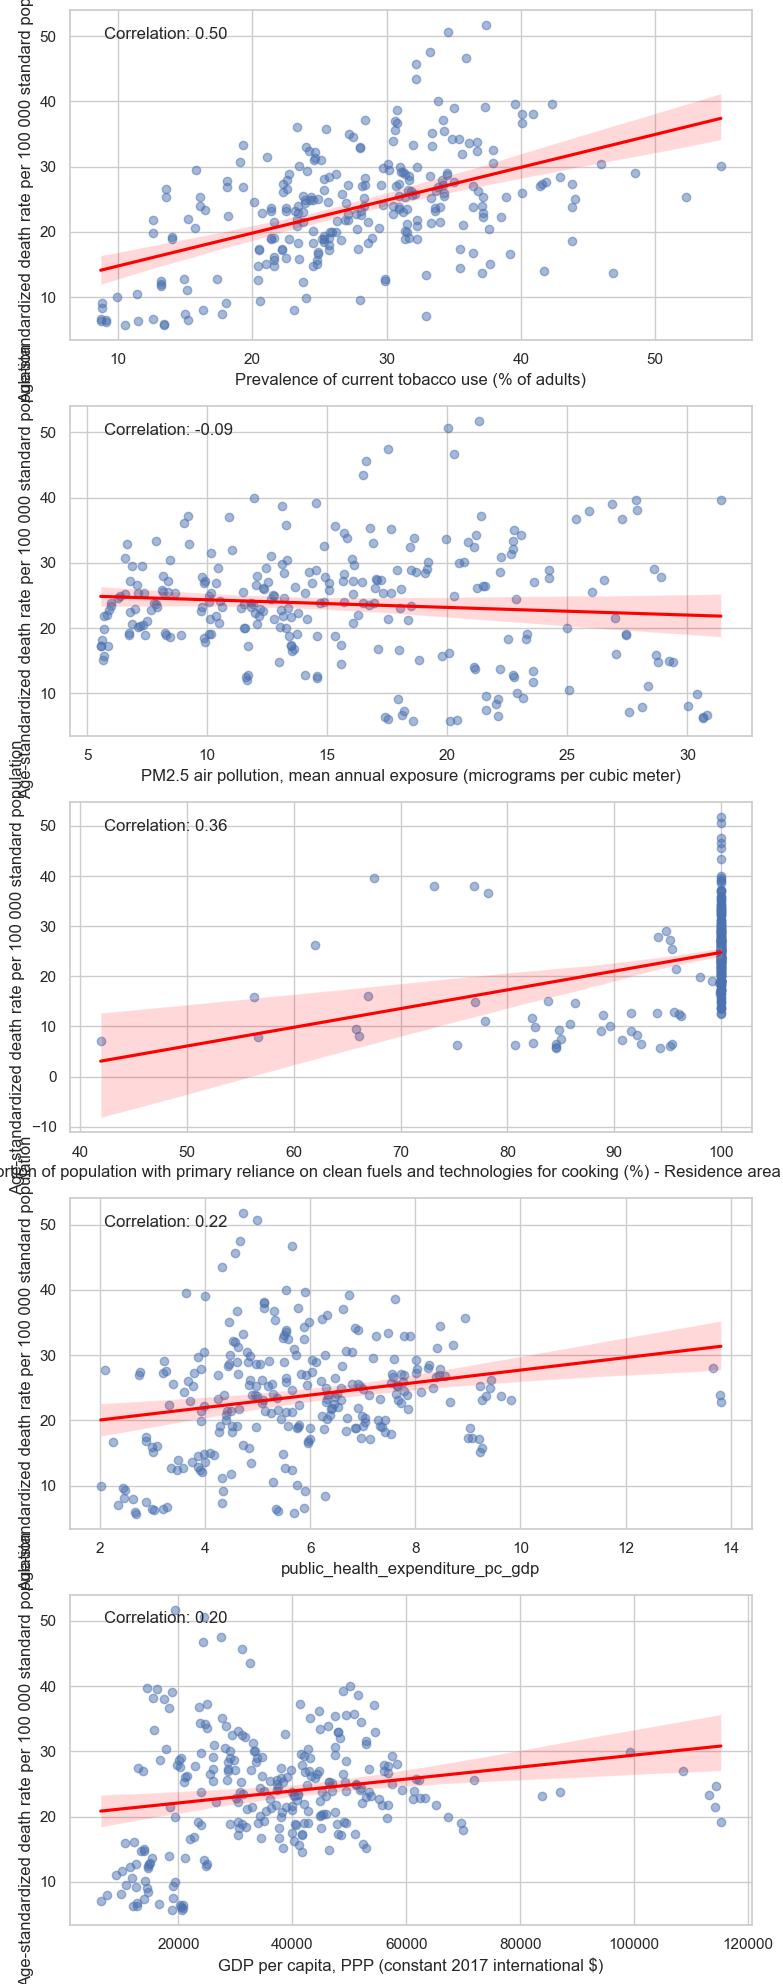

Top two variables with the highest impact:
Prevalence of current tobacco use (% of adults) with a correlation of 0.50
Proportion of population with primary reliance on clean fuels and technologies for cooking (%) - Residence area type: Total with a correlation of 0.36


In [331]:
# Plot for all countries
all_countries_data = pairplots_for_all_countries(merged_df)

They reveal moderate to strong correlations: higher PM2.5 levels are linked to increased death rates, whereas higher public health spending and GDP per capita are associated with lower death rates. The impact of clean cooking technologies on mortality rates appears to be minimal. 

Now we can knw Top two variables with the highest impact:
Prevalence of current tobacco use (% of adults) with a correlation of 0.50
Proportion of population with primary reliance on clean fuels and technologies for cooking (%) - Residence area type: Total with a correlation of 0.36

**这里有个问题是我加了上了烟草数据，算相关性后前两名是烟草和population**

![Literate_Programming](lung.jpg)

In [133]:
def pair_plot_age_standardized(df, country_code):
    """
    Create scatter plots of 'Age-standardized death rate per 100 000 standard population'
    against each other variable for a specific country, with 'Age-standardized death rate'
    on the y-axis and other variables on the x-axis.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The input DataFrame
    country_code : str
        The country code to filter data
    """
    # Filter data for the specific country
    country_df = df[df['Code'] == country_code].copy()
    
    # Sort by year to ensure correct plotting
    country_df = country_df.sort_values('Year')
    
    # Target variable for y-axis
    y_col = 'Age-standardized death rate per 100 000 standard population'
    if y_col not in country_df.columns:
        print(f"{y_col} not found in data.")
        return
    
    # Select numeric columns (exclude non-numeric)
    numeric_cols = country_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
    numeric_cols = [col for col in numeric_cols if col not in ['Year', 'Number', y_col]]
    
    # Drop rows where the target variable is NaN
    country_df = country_df.dropna(subset=[y_col])
    
    # Create subplots
    num_cols = len(numeric_cols)
    num_rows = (num_cols + 1) // 2  # Ceiling division for rows
    fig, axes = plt.subplots(num_rows, 2, figsize=(20, 5 * num_rows))
    axes = axes.flatten()
    
    # Plot each variable
    for i, col in enumerate(numeric_cols):
        # Drop rows with NaN in the current column
        subset_df = country_df.dropna(subset=[col])
        
        # Plot scatter with y_col on y-axis and current column on x-axis
        axes[i].scatter(subset_df[col], subset_df[y_col], alpha=0.7, color='blue')
        
        # Formatting
        axes[i].set_title(f'{col} vs. {y_col}', fontsize=14)
        axes[i].set_xlabel(col, fontsize=12)
        axes[i].set_ylabel(y_col, fontsize=12)
    
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    # Adjust layout
    plt.suptitle(f'Pairwise Plots for {country_code}', fontsize=16)
    plt.tight_layout()
    
    return country_df


Now let's analyze the relationship between lung cancer death rate in the United States and other variables：

/var/folders/v9/6mztxyzj60z1wvgxnqd81v9h0000gn/T/ipykernel_32683/2722442690.py:58: UserWarning: Glyph 37415 (\N{CJK UNIFIED IDEOGRAPH-9227}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: Glyph 37415 (\N{CJK UNIFIED IDEOGRAPH-9227}) missing from current font.
  func(*args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 37415 (\N{CJK UNIFIED IDEOGRAPH-9227}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


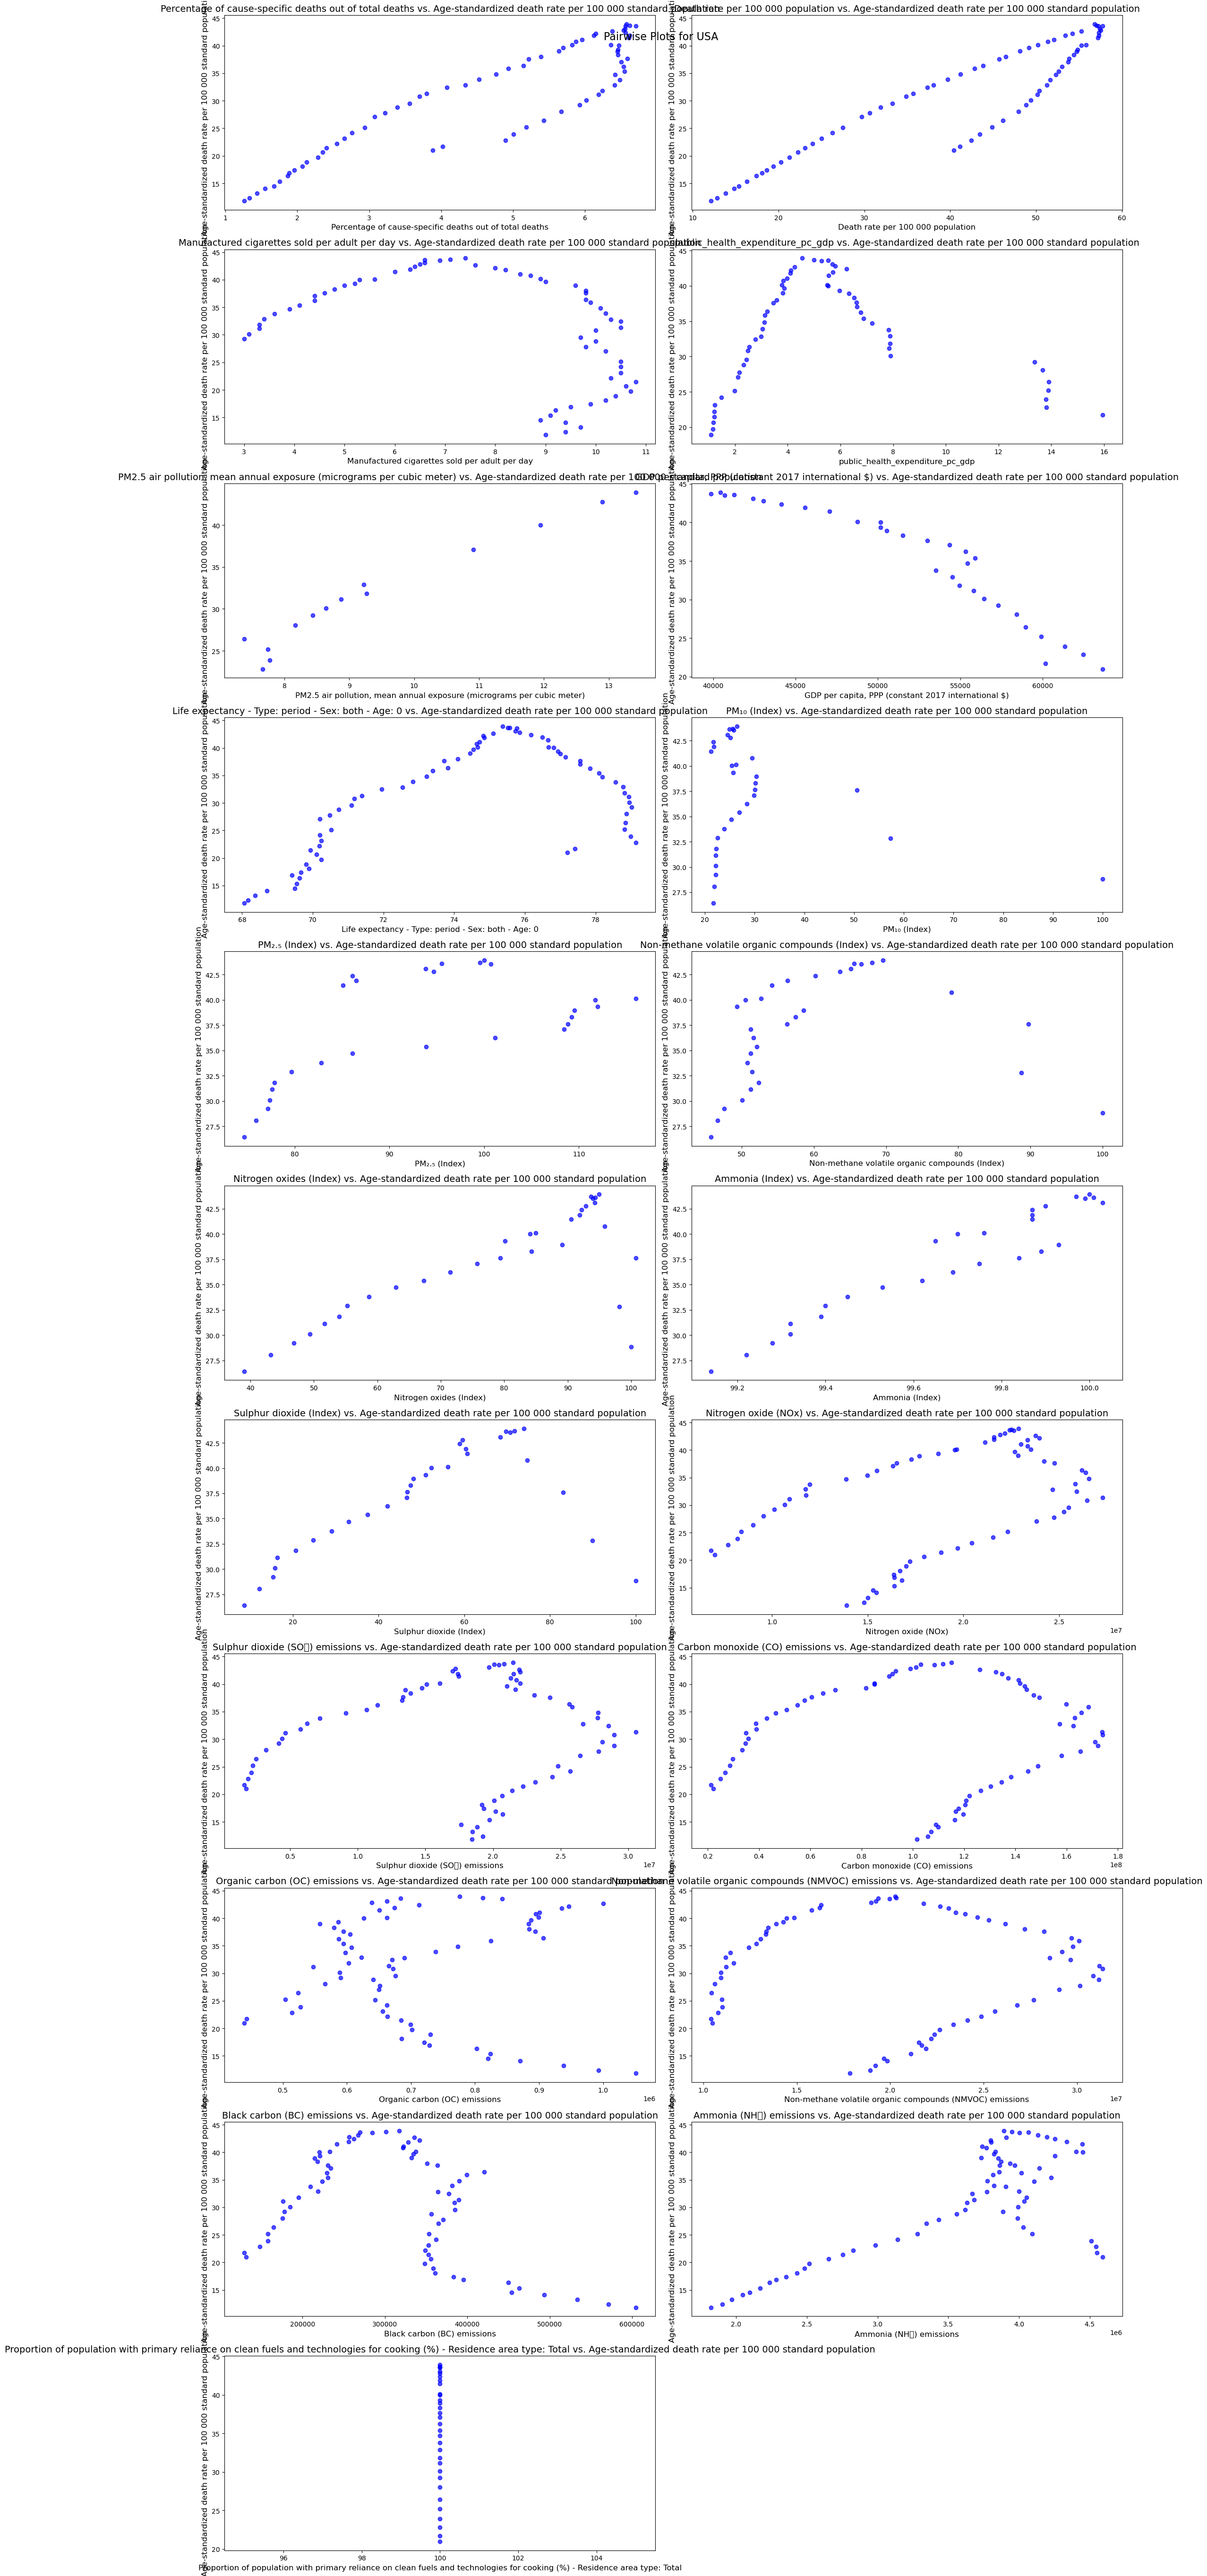

In [415]:
usa4 = pair_plot_age_standardized(merged_df,'USA')

In [365]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_country_data(df, country_code):
    """
    Plots selected numerical columns for a given country code with Year as the x-axis.

    Parameters:
    - df (pd.DataFrame): The dataframe containing the data.
    - country_code (str): The country code to filter data.

    Returns:
    - None: Displays the plot.
    """
    # Define the columns to plot
    columns_to_plot = [
        'Age-standardized death rate per 100 000 standard population',
        'Death rate per 100 000 population',
        'Manufactured cigarettes sold per adult per day',
        'Black carbon (BC) emissions', 
        'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)',
        'public_health_expenditure_pc_gdp',
        'PM₂.₅ (Index)',
        'Life expectancy - Type: period - Sex: both - Age: 0',
        'Proportion of population with primary reliance on clean fuels and technologies for cooking (%) - Residence area type: Total'
    ]
    
    # Filter data for the specified country
    country_data = df[df['Code'] == country_code]
    
    if country_data.empty:
        print(f"No data available for country code: {country_code}")
        return
    
    # Ensure the data is sorted by Year
    country_data = country_data.sort_values('Year')
    
    # Interpolate missing values for smooth lines
    interpolated_data = country_data[['Year'] + columns_to_plot].interpolate(method='linear', axis=0)
    
    # Set up the plot
    plt.figure(figsize=(14, 10))
    
    # Plot each selected column
    for column in columns_to_plot:
        if column in interpolated_data.columns:
            plt.plot(interpolated_data['Year'], interpolated_data[column], label=column, alpha=0.8)
    
    # Customize the plot
    plt.title(f"Trends for {country_code} Over Time", fontsize=16)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Value", fontsize=14)
    plt.legend(loc='best', fontsize=10)
    plt.grid(True, alpha=0.3)
    
    # Display the plot
    plt.tight_layout()
    plt.show()


In [367]:
usadata = plot_country_data(merged_df,'USA')

KeyError: "['Manufactured cigarettes sold per adult per day', 'Black carbon (BC) emissions', 'PM₂.₅ (Index)'] not in index"

⬆️上面的只有红色数据是有效的？？

In [135]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_with_multiple_y_axes(df, country_code):
    """
    Plots selected columns for a given country with multiple y-axes to account for differing units.
    
    Parameters:
    - df (pd.DataFrame): The dataframe containing the data.
    - country_code (str): The country code to filter data.
    
    Returns:
    - None: Displays the plot.
    """
    # Define the columns to plot
    columns_to_plot = [
        'Age-standardized death rate per 100 000 standard population',
        'Death rate per 100 000 population',
        'Manufactured cigarettes sold per adult per day',
        'public_health_expenditure_pc_gdp',
        'Black carbon (BC) emissions',
        'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)',
        'Life expectancy - Type: period - Sex: both - Age: 0',
        'PM₂.₅ (Index)',
        'Proportion of population with primary reliance on clean fuels and technologies for cooking (%) - Residence area type: Total'
    ]
    
    # Filter data for the specified country
    country_data = df[df['Code'] == country_code]
    if country_data.empty:
        print(f"No data available for country code: {country_code}")
        return
    
    # Sort by year and interpolate missing values
    country_data = country_data.sort_values('Year')
    interpolated_data = country_data[['Year'] + columns_to_plot].interpolate(method='linear', axis=0)
    
    # Plot with multiple y-axes
    fig, ax1 = plt.subplots(figsize=(14, 10))
    ax2 = ax1.twinx()  # Second y-axis
    ax3 = ax1.twinx()  # Third y-axis (adjust position later)
    
    # Offset the third axis to prevent overlap
    ax3.spines["right"].set_position(("outward", 60))
    
    # Define groups of variables for each axis
    ax1_columns = [
        'Age-standardized death rate per 100 000 standard population'
        # , 'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)'
        ,'Black carbon (BC) emissions'
    ]
    ax2_columns = [
        'Manufactured cigarettes sold per adult per day'
       
    ]
    ax3_columns = [
        'Proportion of population with primary reliance on clean fuels and technologies for cooking (%) - Residence area type: Total',
        'Life expectancy - Type: period - Sex: both - Age: 0'
        
    ]
    
    # Plot each group of columns
    for column in ax1_columns:
        ax1.plot(interpolated_data['Year'], interpolated_data[column], label=column)
    for column in ax2_columns:
        ax2.plot(interpolated_data['Year'], interpolated_data[column], label=column)
    for column in ax3_columns:
        ax3.plot(interpolated_data['Year'], interpolated_data[column], label=column)
    
    # Set axis labels
    ax1.set_xlabel('Year', fontsize=14)
    ax1.set_ylabel('Axis 1 Variables', fontsize=12)
    ax2.set_ylabel('Axis 2 Variables', fontsize=12)
    ax3.set_ylabel('Axis 3 Variables', fontsize=12)
    
    # Create legends
    ax1.legend(loc="upper left", fontsize=10)
    ax2.legend(loc="upper center", fontsize=10)
    ax3.legend(loc="upper right", fontsize=10)
    
    # Customize plot
    plt.title(f"Trends for {country_code} with Multiple Y-Axes", fontsize=16)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    
    # Show plot
    plt.show()


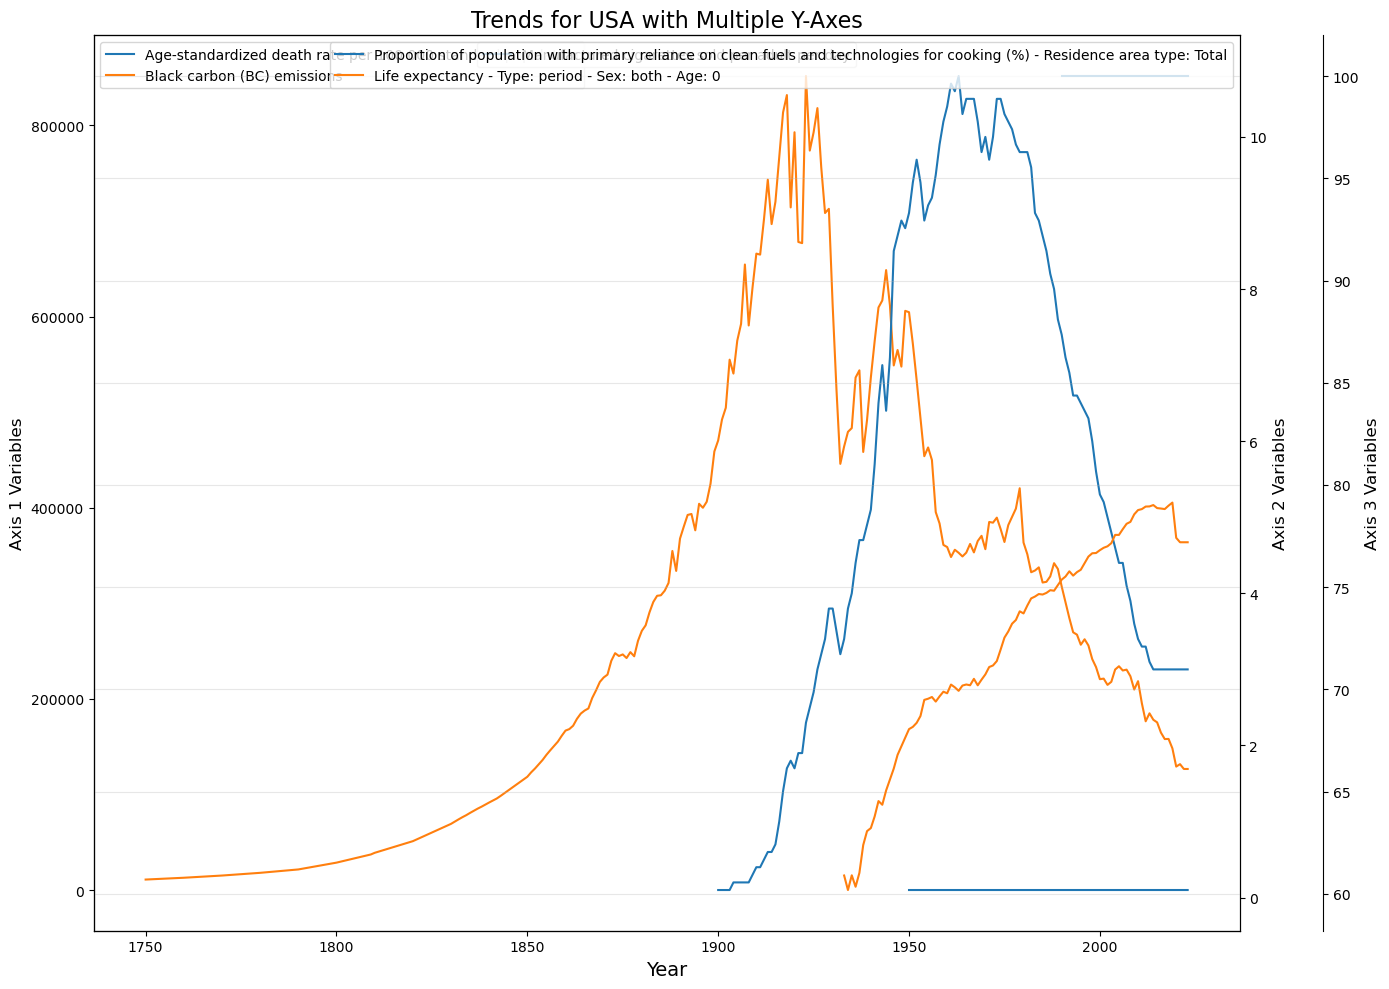

In [465]:
usa2 = plot_with_multiple_y_axes(merged_df,'USA')

In [467]:
def plot_normalized_data(df, country_code):
    """
    Plots normalized values of selected columns for a given country with Year on the x-axis.

    Parameters:
    - df (pd.DataFrame): The dataframe containing the data.
    - country_code (str): The country code to filter data.

    Returns:
    - None: Displays the plot.
    """
    # Define the columns to plot
    columns_to_plot = [
        'Age-standardized death rate per 100 000 standard population',
        # 'Death rate per 100 000 population',
        'Manufactured cigarettes sold per adult per day',
        'public_health_expenditure_pc_gdp',
        'Black carbon (BC) emissions',
        # 'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)',
        # 'Life expectancy - Type: period - Sex: both - Age: 0',
        # 'PM₂.₅ (Index)',
        'Proportion of population with primary reliance on clean fuels and technologies for cooking (%) - Residence area type: Total'
    ]
    
    # Filter data for the specified country
    country_data = df[df['Code'] == country_code]
    if country_data.empty:
        print(f"No data available for country code: {country_code}")
        return
    
    # Sort by year and interpolate missing values
    country_data = country_data.sort_values('Year')
    interpolated_data = country_data[['Year'] + columns_to_plot].interpolate(method='linear', axis=0)
    
    # Normalize the data
    normalized_data = interpolated_data.copy()
    for column in columns_to_plot:
        if column in normalized_data.columns:
            normalized_data[column] = (normalized_data[column] - normalized_data[column].min()) / \
                                      (normalized_data[column].max() - normalized_data[column].min())
    
    # Plot the normalized data
    plt.figure(figsize=(14, 10))
    for column in columns_to_plot:
        if column in normalized_data.columns:
            plt.plot(normalized_data['Year'], normalized_data[column], label=column, alpha=0.8)
    
    # Customize the plot
    plt.ylim(0, 1.5)
    plt.title(f"Normalized Trends for {country_code} Over Time", fontsize=16)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Normalized Value (0-1)", fontsize=14)
    plt.legend(loc='best', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()


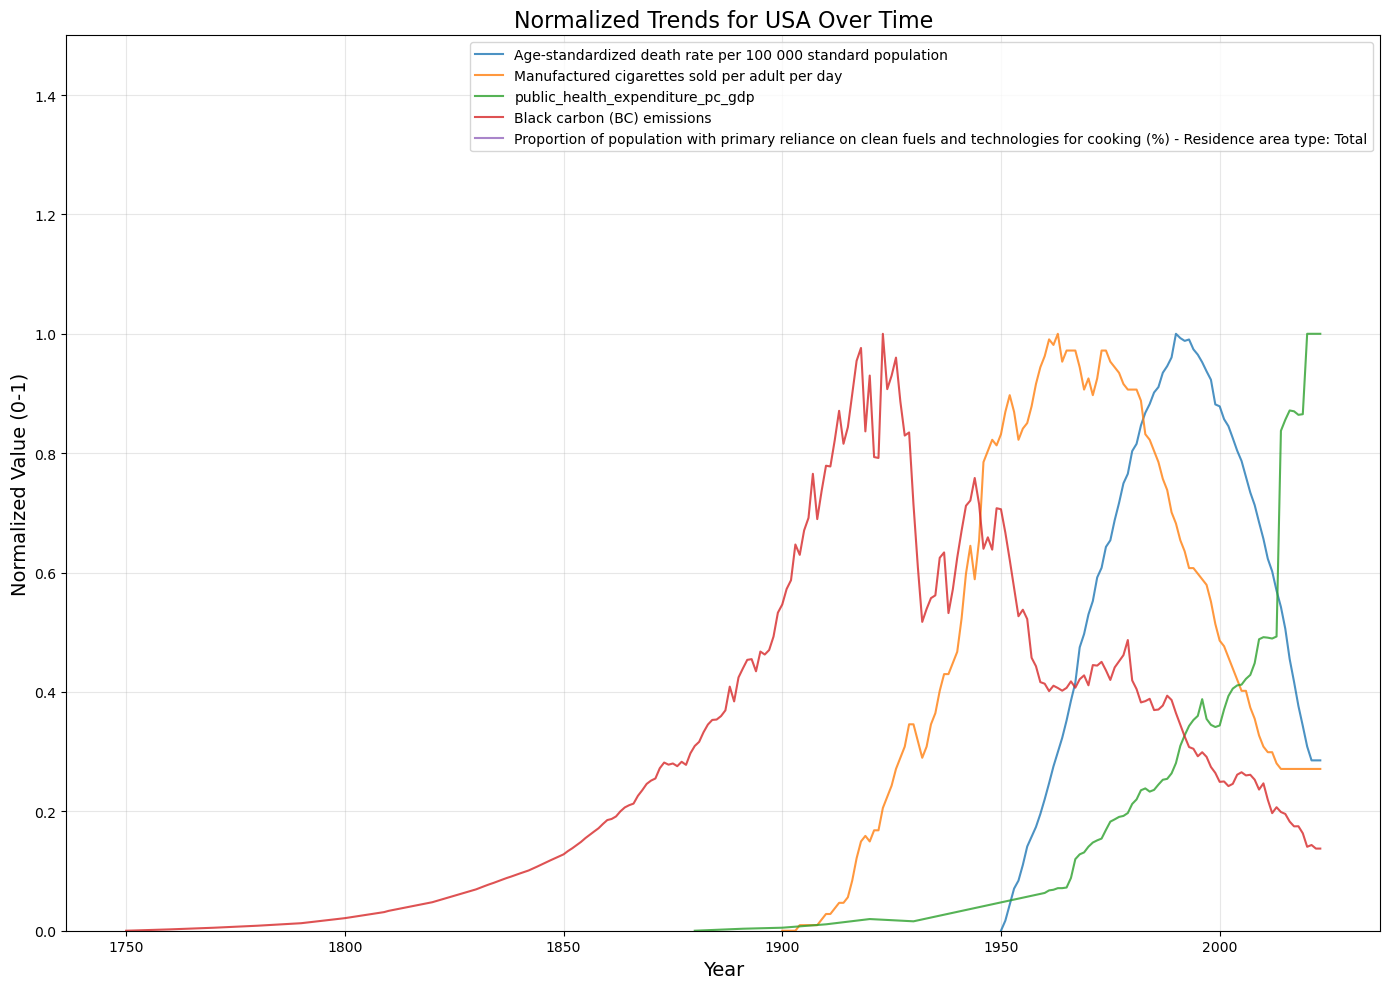

In [469]:
usa3 = plot_normalized_data(merged_df,'USA')

![Literate_Programming](p0.jpg)

In [258]:
import pandas as pd
import statsmodels.api as sm

# Ensure the data is loaded correctly by printing the DataFrame's columns
print(merged_df.columns)

# Check for and handle missing or infinite values in your DataFrame
merged_df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)  # Replace all infinities with NA
merged_df.dropna(inplace=True)  # Drop all rows with NA values

# Selecting the predictors and the response variable
# Adjust column names as needed to match your DataFrame
X = merged_df[['PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)', 'Prevalence of current tobacco use (% of adults)']]
y = merged_df['Age-standardized death rate per 100 000 standard population']

# Adding a constant to the model (for the intercept)
X = sm.add_constant(X)

# Fitting the model
model = sm.OLS(y, X).fit()

# Printing the summary of the model
print(model.summary())


Index(['Entity', 'Code', 'Year', 'Number',
       'Percentage of cause-specific deaths out of total deaths',
       'Age-standardized death rate per 100 000 standard population',
       'Death rate per 100 000 population',
       'Proportion of population with primary reliance on clean fuels and technologies for cooking (%) - Residence area type: Total',
       'Life expectancy - Type: period - Sex: both - Age: 0',
       'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)',
       'GDP per capita, PPP (constant 2017 international $)',
       'public_health_expenditure_pc_gdp',
       'Prevalence of current tobacco use (% of adults)'],
      dtype='object')
                                                 OLS Regression Results                                                
Dep. Variable:     Age-standardized death rate per 100 000 standard population   R-squared:                       0.262
Model:                                                                    

We could noticed there are about 20 years delay?

Main Findings:

PM2.5 Air Pollution: The model suggests that an increase in air pollution is associated with a slight decrease in the death rate. This result is unexpected because we usually think that more pollution would lead to more health problems, not fewer. This could mean there are other factors not included in the model that are influencing the results.
Smoking: As expected, the model found that places with more smokers have higher rates of lung cancer deaths. This result is very strong and aligns with what health experts tell us about the dangers of smoking.
Model Performance:

The model explains about 26% of the differences in lung cancer death rates across different areas. This is not very high, which means there could be other important factors that the model is not considering.
Model Reliability:

The tests included in the summary suggest that the data might not perfectly fit the assumptions required for this type of model. For example, the data are not spread out as normally as expected, which can affect how much we can trust the predictions.

In [263]:
For USA:

In [271]:
import pandas as pd
import statsmodels.api as sm

usa_data = merged_df[merged_df['Code'] == 'USA'].copy()

# Check for and handle missing or infinite values in your DataFrame
usa_data.replace([float('inf'), -float('inf')], pd.NA, inplace=True)  # Replace all infinities with NA
usa_data.dropna(inplace=True)  # Drop all rows with NA values

# Selecting the predictors and the response variable
# Adjust column names as needed to match your DataFrame
X = usa_data[['PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)', 'Prevalence of current tobacco use (% of adults)']]
y = usa_data['Age-standardized death rate per 100 000 standard population']

# Adding a constant to the model (for the intercept)
X = sm.add_constant(X)

# Fitting the model
model = sm.OLS(y, X).fit()

# Printing the summary of the model
print(model.summary())

                                                 OLS Regression Results                                                
Dep. Variable:     Age-standardized death rate per 100 000 standard population   R-squared:                       0.975
Model:                                                                     OLS   Adj. R-squared:                  0.959
Method:                                                          Least Squares   F-statistic:                     59.58
Date:                                                         Sun, 08 Dec 2024   Prob (F-statistic):            0.00385
Time:                                                                 08:55:51   Log-Likelihood:                -8.5502
No. Observations:                                                            6   AIC:                             23.10
Df Residuals:                                                                3   BIC:                             22.48
Df Model:                               

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [275]:
import pandas as pd
import statsmodels.api as sm

hun_data = merged_df[merged_df['Code'] == 'HUN'].copy()

# Check for and handle missing or infinite values in your DataFrame
usa_data.replace([float('inf'), -float('inf')], pd.NA, inplace=True)  # Replace all infinities with NA
usa_data.dropna(inplace=True)  # Drop all rows with NA values

# Selecting the predictors and the response variable
# Adjust column names as needed to match your DataFrame
X = usa_data[['PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)', 'Prevalence of current tobacco use (% of adults)']]
y = usa_data['Age-standardized death rate per 100 000 standard population']

# Adding a constant to the model (for the intercept)
X = sm.add_constant(X)

# Fitting the model
model = sm.OLS(y, X).fit()

# Printing the summary of the model
print(model.summary())

                                                 OLS Regression Results                                                
Dep. Variable:     Age-standardized death rate per 100 000 standard population   R-squared:                       0.707
Model:                                                                     OLS   Adj. R-squared:                  0.512
Method:                                                          Least Squares   F-statistic:                     3.623
Date:                                                         Sun, 08 Dec 2024   Prob (F-statistic):              0.158
Time:                                                                 08:56:35   Log-Likelihood:                -11.068
No. Observations:                                                            6   AIC:                             28.14
Df Residuals:                                                                3   BIC:                             27.51
Df Model:                               

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
